In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from tabulate import tabulate
import hvplot.pandas
import numpy as np


In [2]:
person = pd.read_csv('PERSON.csv')
person = person.set_index(['ACCIDENT_NO'])
location = pd.read_csv('ACCIDENT_LOCATION.csv')
location = location.set_index(['ACCIDENT_NO'])
Deaths = pd.read_csv('ACCIDENT.csv')
Deaths = Deaths.set_index(['ACCIDENT_NO'])

/var/folders/dq/3170fsj54mj7dvthb0kwkzww0000gn/T/ipykernel_57968/4284295414.py:1: DtypeWarning: Columns (6,9,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  person = pd.read_csv('PERSON.csv')
/var/folders/dq/3170fsj54mj7dvthb0kwkzww0000gn/T/ipykernel_57968/4284295414.py:5: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  Deaths = pd.read_csv('ACCIDENT.csv')


In [3]:

#Deaths['Any_fatalities'] = Deaths['NO_PERSONS_KILLED'].apply(lambda x: 1 if x >0 else 0)
Deaths_happened = Deaths.loc[:,['NO_PERSONS_KILLED','NO_PERSONS','SPEED_ZONE','DAY_OF_WEEK','LIGHT_CONDITION']]
#Deaths_happened['ACCIDENTTIME'] = pd.to_datetime(Deaths_happened['ACCIDENTTIME'].str.strip(), format="%H:%M:%S")



accident_location_distance = location['DISTANCE_LOCATION']
accident_location_distance = accident_location_distance.dropna()

age = person['AGE']
df_age = age[~age.index.duplicated(keep='first')]
df_age = df_age.dropna()

collated = pd.concat([accident_location_distance,df_age,Deaths_happened],join = 'inner',axis = 1)
collated = collated.dropna('LIGHT_CONDITION' == 9)
collated

/var/folders/dq/3170fsj54mj7dvthb0kwkzww0000gn/T/ipykernel_57968/2355062295.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  collated = collated.dropna('LIGHT_CONDITION' == 9)


,DISTANCE_LOCATION,AGE,NO_PERSONS_KILLED,NO_PERSONS,SPEED_ZONE,DAY_OF_WEEK,LIGHT_CONDITION
ACCIDENT_NO,,,,,,,
T20060000018,70.0,18.0,0,4,70,6,1
T20060000022,210.0,50.0,0,2,100,7,1
T20060000023,0.0,43.0,0,2,80,7,1
T20060000026,20.0,38.0,0,3,50,7,1
T20060000028,49.0,85.0,0,2,100,7,1
...,...,...,...,...,...,...,...
T20200019239,147.0,31.0,0,4,50,0,1
T20200019247,413.0,15.0,0,2,999,1,1
T20200019250,0.0,45.0,0,2,60,0,1


In [4]:
reg = linear_model.LinearRegression()
reg.fit(collated[['DISTANCE_LOCATION','AGE','NO_PERSONS','SPEED_ZONE','DAY_OF_WEEK','LIGHT_CONDITION']],collated.NO_PERSONS_KILLED)

LinearRegression()

In [ ]:
coeffs = reg.coef_
integer_coeffs = []
dic = {}
print(dic)
coloumn_names = collated.columns
coloumn_names = list(coloumn_names)
removed_value = coloumn_names.remove('NO_PERSONS_KILLED')
for i in range(len(coeffs)):
    dic[coloumn_names[i]] = coeffs[i]
intercept = reg.intercept_
equation_parts = [f"{coeffs[i]} * x{i+1}" for i in range(len(coeffs))]
equation = f"y = {intercept} + " + " + ".join(equation_parts)
print(equation)


table_data = [[key, value] for key, value in dic.items()]

#Display the table
table = tabulate(table_data, headers=["Factor", "Coeffecient"], tablefmt="fancy_grid")
print(table)


{}
y = -0.012391842066905166 + 2.2717819165578336e-05 * x1 + 0.0002867999524392014 * x2 + 0.004504001719096644 * x3 + -1.7279504349016203e-05 * x4 + 0.000604762714639547 * x5 + 0.004106168035661047 * x6
╒═══════════════════╤═══════════════╕
│ Factor            │   Coeffecient │
╞═══════════════════╪═══════════════╡
│ DISTANCE_LOCATION │   2.27178e-05 │
├───────────────────┼───────────────┤
│ AGE               │   0.0002868   │
├───────────────────┼───────────────┤
│ NO_PERSONS        │   0.004504    │
├───────────────────┼───────────────┤
│ SPEED_ZONE        │  -1.72795e-05 │
├───────────────────┼───────────────┤
│ DAY_OF_WEEK       │   0.000604763 │
├───────────────────┼───────────────┤
│ LIGHT_CONDITION   │   0.00410617  │
╘═══════════════════╧═══════════════╛


In [ ]:
#User Inputs To Create A Prediction of The possibilty of death in a crash
distance_from_location = int(input("How far away was the crash from location (m): "))
Age = int(input("How old was driver of car: "))
No_person = int(input("How many people involved in the crash: "))
speed_limit = int(input("What was the speed limit (km/h): "))
day_of_week = int(input("What was the day of the week - enter a number (1-7): "))
lighting_condition = int(input("What was the lighting conditions:    "))

prediction = reg.predict([[distance_from_location,Age,No_person,speed_limit,day_of_week,lighting_condition]])

print(f"Based on your inputs, the number of people predicted to die from this accident is {prediction}")

How far away was the crash from location (m):  10
How old was driver of car:  34
How many people involved in the crash:  4
What was the speed limit (km/h):  40
What was the day of the week - enter a number (1-7):  7
What was the lighting conditions:     6


Based on your inputs, the number of people predicted to die from this accident is [0.04378171]


/Users/ashwinrao/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


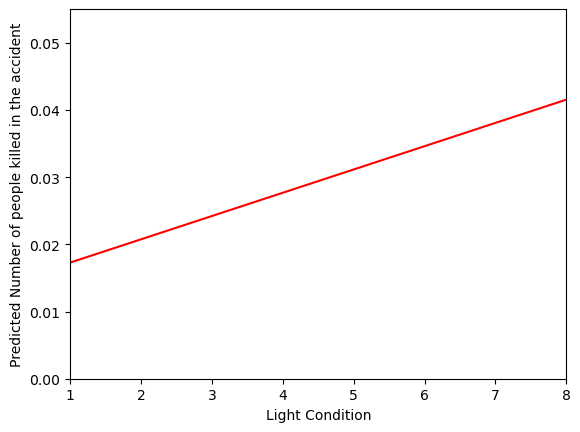

In [100]:
def my_function(x, y):
    x = np.array(x)
    y = np.array(y)
    plt.xlabel('X')
    plt.ylabel('Y')
    x = x.reshape(-1, 1)  # Reshape the data to a 2D array
    model = linear_model.LinearRegression()
    model.fit(x, y)
    x_range = np.linspace(x.min(), x.max(), 100)  # Generate points for the line
    y_pred = model.predict(x_range.reshape(-1, 1))  # Predicted values for the line
    plt.plot(x_range, y_pred, color='red', label='Line of Best Fit')
    # Adjust the y-axis limits to reduce the overall scale
    y_scale_factor = 0.005 # Adjust this value to control the scale reduction
    plt.xlim(1,8)
    plt.ylim(min(y) * y_scale_factor, max(y) * y_scale_factor)
    plt.xlabel('Light Condition')
    plt.ylabel(f"Predicted Number of people killed in the accident")
my_function(x = collated['LIGHT_CONDITION'], y = collated['NO_PERSONS_KILLED'])




#x_range = np.linspace(x.min(), x.max(), 100)  # Generate points for the line
#y_pred = model.predict(x_range.reshape(-1, 1))  # Predicted values for the line
#plt.plot(x_range, y_pred, color='red', label='Line of Best Fit')
#plt.scatter(collated['NO_PERSONS'], collated['NO_PERSONS_KILLED'], label='Data points')  # Scatter plot of data points
